# Midterm B&M, Inc.

## Midterms (20% of your final grade)
There are three deliverables for the mid-term project:
* 1. Update your project proposal and resubmit. Follow the same guidelines as posted in your Group Assignment #1.
* 2. Create a new Jupyter Notebook. Make sure to mix in markdown cells and code cells so that the notebook tells a cohesive narrative. Your notebook should:
  * state the research question
  * identify data sources
  * conduct data exploration
  * data analysis
    * produce at least three charts
    * one chart can be a "bad" chart, with a second chart that improves upon it
  * map visualization
    * produce at least one static map and one interactive map
    * the maps must have at least one data overlay
  * in the last cell of the notebook, list each group member and describe the division of labor, and what each member's contribution was to the project
* 3. Present your project to the class

## Research Question

* 

## Bailey's part

We first import the appropriate libraries to the notebook.

Then we pull US Census's 2019 American Community Survey data from Census Reporter. The GEOJSON file contains every census tracts in the City of Los Angeles with the variable of median household income loaded. We drop row 1004 because the data is an average for the entire city and not its own census tract.
- Source link: https://censusreporter.org/data/table/?table=B02001&geo_ids=16000US0644000,140|16000US0644000&primary_geo_id=16000US0644000)

We will also be using the the City of Los Angeles’s geospatial data of existing bike lanes, last updated in November 2021. 
- Source link: https://geohub.lacity.org/datasets/ladot::city-of-los-angeles-bikeways-1/about

Lastly we will be using the traffic collision data from 2010 to the present (January 2022) as documented by the LAPD. 
- Source link: https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w

In [2]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# making dataframe 
df = pd.read_csv("BikeAccidents.csv") 

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
mhi = gpd.read_file('acs2019_5yr_B19013_14000US06037222001.geojson')

In [5]:
mhi.sample(10)

,geoid,name,B19013001,"B19013001, Error",geometry
861,14000US06037267402,"Census Tract 2674.02, Los Angeles, CA",87095.0,19279.0,"MULTIPOLYGON (((-118.47089 34.04133, -118.4703..."
910,14000US06037273700,"Census Tract 2737, Los Angeles, CA",96719.0,21387.0,"MULTIPOLYGON (((-118.45907 33.99736, -118.4589..."
844,14000US06037265100,"Census Tract 2651, Los Angeles, CA",112500.0,23765.0,"MULTIPOLYGON (((-118.43942 34.07825, -118.4379..."
895,14000US06037271801,"Census Tract 2718.01, Los Angeles, CA",55417.0,7138.0,"MULTIPOLYGON (((-118.42329 34.01889, -118.4231..."
771,14000US06037237402,"Census Tract 2374.02, Los Angeles, CA",45875.0,21890.0,"MULTIPOLYGON (((-118.30462 33.97538, -118.3046..."
465,14000US06037195300,"Census Tract 1953, Los Angeles, CA",75104.0,8721.0,"MULTIPOLYGON (((-118.29177 34.10178, -118.2895..."
741,14000US06037232400,"Census Tract 2324, Los Angeles, CA",46883.0,6195.0,"MULTIPOLYGON (((-118.31711 33.99997, -118.3171..."
153,14000US06037121101,"Census Tract 1211.01, Los Angeles, CA",59267.0,9339.0,"MULTIPOLYGON (((-118.37168 34.22372, -118.3708..."
598,14000US06037212202,"Census Tract 2122.02, Los Angeles, CA",39229.0,6592.0,"MULTIPOLYGON (((-118.29163 34.05776, -118.2903..."
231,14000US06037127806,"Census Tract 1278.06, Los Angeles, CA",42946.0,15830.0,"MULTIPOLYGON (((-118.46618 34.19029, -118.4640..."


In [9]:
mhi.tail(5)

,geoid,name,B19013001,"B19013001, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",62142.0,452.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [10]:
mhi = mhi.drop([1004])
mhi.tail(5)

,geoid,name,B19013001,"B19013001, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",150250.0,13582.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [6]:
bwy = gpd.read_file('City_of_Los_Angeles_Bikeways.geojson')

In [7]:
bwy.sample(10)

,OBJECTID_12,SECT_ID,STREET_DES,OTHER,STR_FROM,STR_TO,ST_TYPE,WIDTH_,CL_Miles,Lane_Miles,...,Comments,Tag,Level_Protection,Level_ProtectionNotes,Level_Protetion2,Project_Name,Year_,Shape__Length,GlobalID,geometry
3627,3709,5151400,Secondary Highway,,PATTON AV,HARBOR VIEW AV,Select,48.0,0.127853,0.255706,...,,3513.0,0.0,None,0,None,2012.0,675.062371,93fa9893-7a8a-4d7d-bd6b-3db446eec368,"LINESTRING Z (-118.30645 33.74698 0.00000, -11..."
5414,5555,6437400,Major Highway - Class II,,CONSTELLATION WY (PVT),WHITES POINT DR,Select,64.0,0.139494,0.278988,...,None,5526.0,1.0,None,Temporary Treatments,None,2018.0,736.526825,a98bb9a6-f3c0-43f5-95e5-4f190d1d46e0,"LINESTRING Z (-118.30905 33.72160 0.00000, -11..."
3992,4083,5689450,Secondary Highway,,BUSHNELL WY,MONTEREY RD,Local,56.0,0.079430,0.158860,...,,3968.0,0.0,None,0,None,2013.0,419.391485,9d73d1ba-21db-436c-a653-90692ec6217c,"LINESTRING Z (-118.18485 34.10453 0.00000, -11..."
1179,1210,2670700,Secondary Highway,,74TH ST,75TH ST,Select,56.0,0.066688,0.133376,...,,1180.0,0.0,None,0,None,2005.0,352.112449,9f09b105-2c86-4759-becc-b25c1be69ef9,"LINESTRING Z (-118.28710 33.97268 0.00000, -11..."
1452,1484,5937100,Major Highway - Class II,,ROCHESTER AV,WILKINS AV,Select,80.0,0.066547,0.133094,...,,1473.0,0.0,None,0,None,2005.0,351.367266,04b23b79-e243-4956-9cd8-75134add4655,"LINESTRING Z (-118.44227 34.05619 0.00000, -11..."
560,572,4337100,Secondary Highway,,NATICK AV,LEMONA AV,Select,66.0,0.038341,0.076682,...,,525.0,0.0,None,0,None,2005.0,202.440639,6fd3dc88-13cf-4d74-bc8c-200a9fbc7f6d,"LINESTRING Z (-118.45689 34.24272 0.00000, -11..."
4174,4268,1287800,Scenic Major Highway - Class II,,HARTWICK ST,HARTWICK ST,Select,80.0,0.032369,0.064739,...,,4215.0,0.0,None,0,None,2013.0,170.910080,e735d4d4-aaba-45b3-be72-8199ace4f101,"LINESTRING Z (-118.19697 34.13932 0.00000, -11..."
5663,5811,0014400,Scenic Major Highway - Class II,,TOBERMAN ST,HOOVER ST,Select,69.0,0.039259,0.078519,...,,5791.0,0.0,None,0,None,2010.0,207.289077,ffced717-04b9-4f24-ae73-4e2c02efcb51,"LINESTRING Z (-118.28337 34.03143 0.00000, -11..."
4860,4967,1287200,Scenic Major Highway - Class II,N RDWY,LINDA ROSA AV,EAGLE VISTA DR,Select,57.0,0.135412,0.135412,...,,4913.0,0.0,None,0,None,2013.0,714.977113,7e30f5b5-2a08-483c-8784-84ceb58c938c,"LINESTRING Z (-118.19318 34.13883 0.00000, -11..."
6563,6806,5593400,,,VENICE WY,CRENSHAW BL (E/B)/LA FAYETTE RD (W/B),,0.0,0.066337,0.066337,...,,6028.0,0.0,None,0,Resurfacing - 20/21,2020.0,350.260108,f498e6fb-081a-4bf7-a16a-d300095070d7,"LINESTRING Z (-118.39776 34.02376 0.00000, -11..."


In [11]:
bwy.tail(5)

,OBJECTID_12,SECT_ID,STREET_DES,OTHER,STR_FROM,STR_TO,ST_TYPE,WIDTH_,CL_Miles,Lane_Miles,...,Comments,Tag,Level_Protection,Level_ProtectionNotes,Level_Protetion2,Project_Name,Year_,Shape__Length,GlobalID,geometry
6768,7029,5473700,Scenic Major Highway - Class II,,KITTRIDGE ST,HAMLIN ST,Select,80.0,0.054003,0.108005,...,,3731.0,0.0,None,0,Resurfacing 22/22,2021.0,285.133785,e28e5ccc-b4f3-48bb-86a2-3d9b519d4747,"LINESTRING Z (-118.65577 34.18967 0.00000, -11..."
6769,7030,5473900,Scenic Major Highway - Class II,,VALLEY CIRCLE TE,VICTORY BL,Select,80.0,0.063629,0.127259,...,,3831.0,0.0,None,0,Resurfacing 22/22,2021.0,335.962447,d6c97ab3-40b7-4866-a377-486c00a667c4,"LINESTRING Z (-118.65573 34.18557 0.00000, -11..."
6770,7031,5473700,Scenic Major Highway - Class II,,KITTRIDGE ST,HAMLIN ST,Select,80.0,0.112990,0.225980,...,,4990.0,0.0,None,0,Resurfacing 22/22,2021.0,596.587646,3708bbb8-d6c5-4867-aaae-f7dba8793820,"LINESTRING Z (-118.65536 34.18809 0.00000, -11..."
6771,7032,5473900,Scenic Major Highway - Class II,,VALLEY CIRCLE TE,VICTORY BL,Select,80.0,0.062978,0.125956,...,,4991.0,0.0,None,0,Resurfacing 22/22,2021.0,332.524100,fa75a078-e085-426f-87bd-2941652df1f5,"LINESTRING Z (-118.65585 34.18466 0.00000, -11..."
6772,7033,5473500,Scenic Major Highway - Class II,,VANOWEN ST,WELBY WAY,Select,0.0,0.061742,0.061742,...,Not Installed Westside of St/Out of City Limit,6297.0,0.0,None,0,Resurfacing 22/22,2021.0,325.995785,56c8b078-f1aa-4c83-9ab7-e8aeb774a6ca,"LINESTRING Z (-118.65693 34.19411 0.00000, -11..."


## Initial bar graph of Median Household Income by Census Tract

Let's create a histogram of MHI by census tract to see the distribution across the city. Let's first clean the data columns though.

In [13]:
list(mhi)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

In [15]:
columns_to_keep = ['geoid', 'name', 'B19013001', 'geometry']

In [16]:
mhi = mhi[columns_to_keep]

In [20]:
mhi.columns = ['geoid', 'name', 'MHI', 'geometry']

In [21]:
mhi.head()

,geoid,name,MHI,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


<AxesSubplot:ylabel='Frequency'>

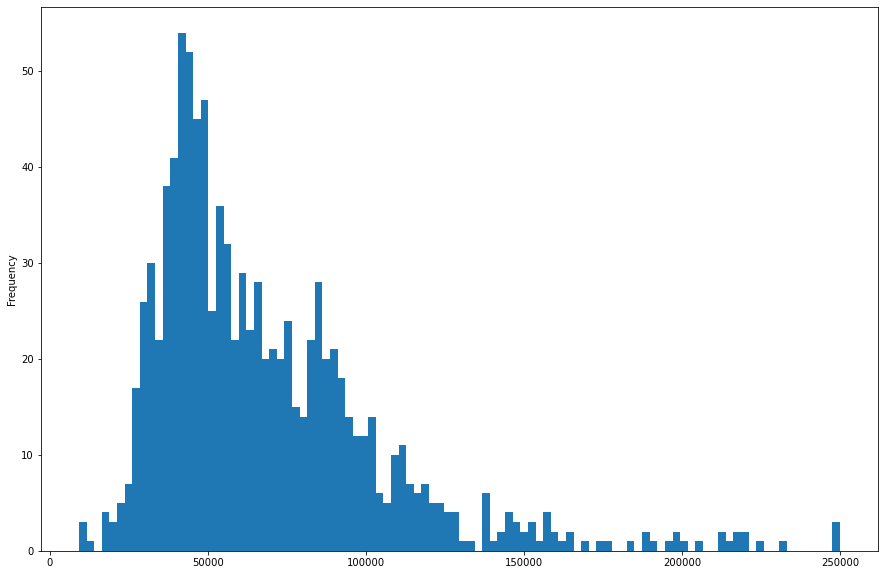

In [31]:
mhi['MHI'].plot.hist(figsize=(15,10),
                     bins=100
                    )

In [32]:
## Creating Bike Lan Map Superimposed above Census Tracts by Median Household Income in Los Angeles

In [37]:
mhi_web_mercator = mhi.to_crs(epsg=3857)
bwy_web_mercator = bwy.to_crs(epsg=3857)

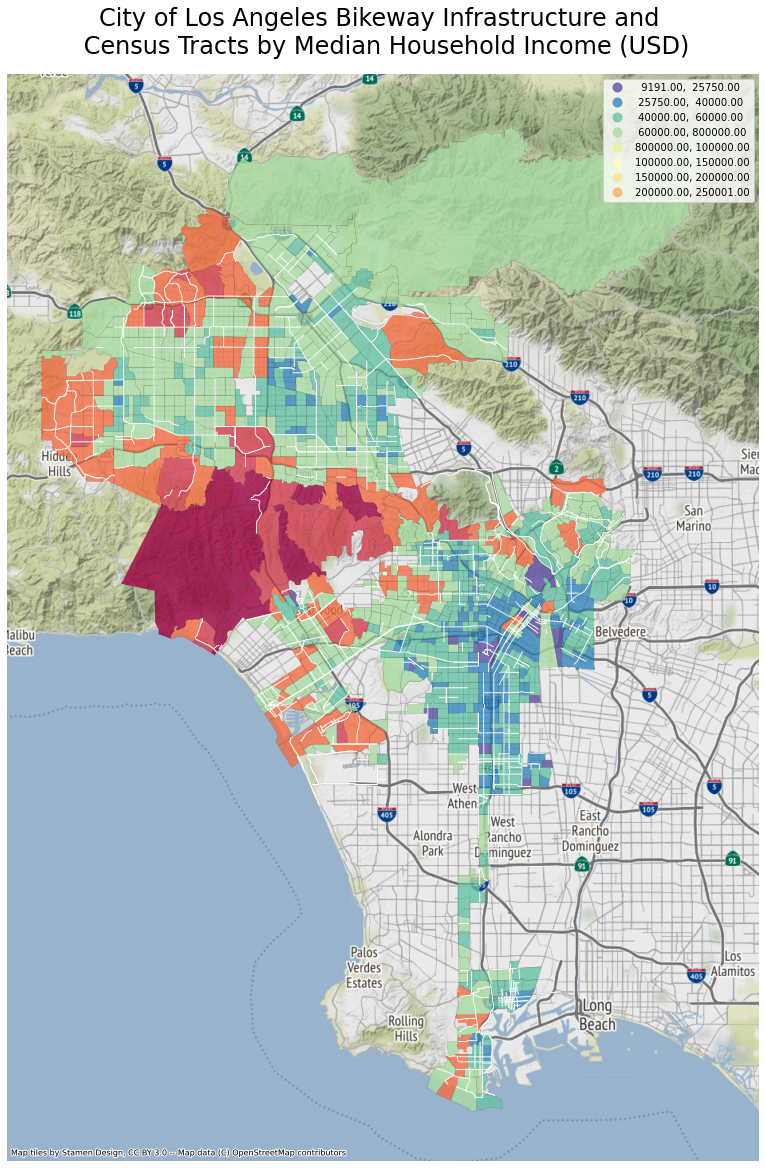

In [53]:
fig, ax = plt.subplots(figsize= (20,20))

mhi_web_mercator[mhi_web_mercator['MHI'] > 0].plot(
    ax = ax,
    column= 'MHI', 
    cmap = 'Spectral_r', 
    legend = True, 
    scheme = 'user_defined', 
    classification_kwds={'bins':[25750,40000,60000,800000,100000,150000,200000,250001]}, 
    edgecolor = 'black', 
    linewidth = 0.1, 
    alpha= 0.8
)

bwy_web_mercator.plot(
    ax=ax,
    edgecolor = 'white',
    linewidth = 1
)

ax.axis('off')

ax.set_title('City of Los Angeles Bikeway Infrastructure and \n Census Tracts by Median Household Income (USD)', fontsize=24, pad=20)

ctx.add_basemap(ax)

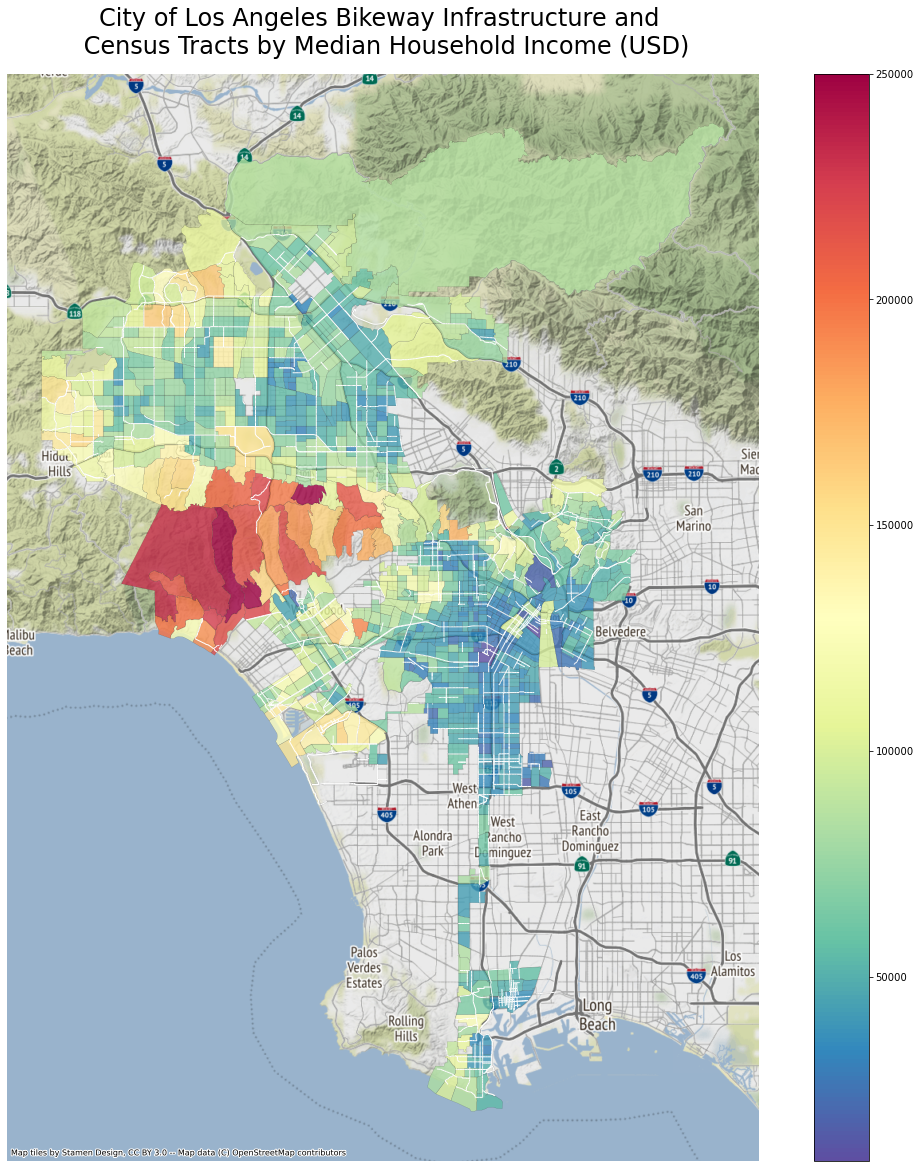

In [52]:
fig, ax = plt.subplots(figsize= (20,20))

mhi_web_mercator[mhi_web_mercator['MHI'] > 0].plot(
    ax = ax,
    column= 'MHI', 
    cmap = 'Spectral_r', 
    legend = True, 
    edgecolor = 'black', 
    linewidth = 0.1, 
    alpha= 0.8
)

bwy_web_mercator.plot(
    ax=ax,
    edgecolor = 'white',
    linewidth = 1
)

ax.axis('off')

ax.set_title('City of Los Angeles Bikeway Infrastructure and \n Census Tracts by Median Household Income (USD)', fontsize=24, pad=20)

ctx.add_basemap(ax)